# Classify sign language digits using a convolutional neural network
This work is part of a collection of practice sets called [Deep Learning Starter](https://github.com/jamiemorales/project-deep-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the deep learning lifecycle early on.
After completion, someone will have built intuition over the deep learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify images of the 0-9 digits in sign language.

## Step 1: Set-up and understand data
In this step, we layout the tools we will need to solve the problem identified in the previous step. We want to inspect our data sources and explore the data itself to gain an understanding of the data for preprocessing and modeling.

In [1]:
# Set-up libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load data
images = np.load('../input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy')
labels = np.load('../input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy')

In [4]:
# Explore data
images_number = images.shape[0]
images_height = 64
images_width = 64
images_size = images_height * images_width

print('Number of images: ', images_number)
print('Height of image: ', images_height)
print('Width of image: ', images_width)
print('Size of image: ', images_size)

print('Shape of dataset: ', images.shape)
print('Shape of labels: ', labels.shape)

Number of images:  2062
Height of image:  64
Width of image:  64
Size of image:  4096
Shape of dataset:  (2062, 64, 64)
Shape of labels:  (2062, 10)


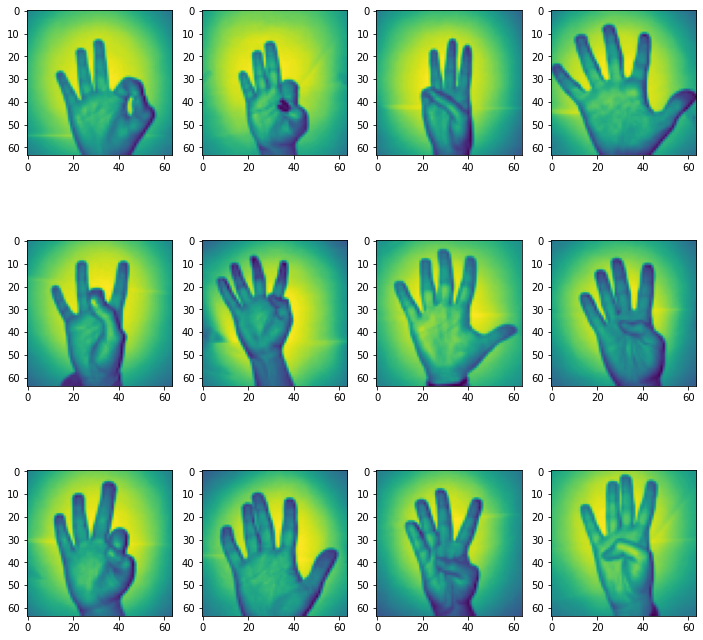

In [5]:
# Explore a few items
plt.figure(figsize=(12,12))

for i in range(1,13):
    random_item = random.randint(1, images_number)
    plt.subplot(3, 4, i)
    plt.imshow(images[random_item])

## Step 2: Prepare data and understand some more
In this step, we perform the necessary transformations on the data so that the neural network would be able to understand it. Real-world datasets are complex and messy. For our purposes, most of the datasets we work on in this series require minimal preparation.

In [6]:
# Reshape data
images = images.reshape(images_number, images_height, images_width, 1)

In [7]:
# Normalise data
images = images / 255.0

In [8]:
# Split data into 80% train and 20% 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=0)

In [9]:
# Explore processed data
train_images_number = train_images.shape[0]
train_images_height = train_images.shape[1]
train_images_width = train_images.shape[2]
train_images_size = train_images_height * train_images_width

print('Number of images: ', train_images_number)
print('Height of image: ', train_images_height)
print('Width of image: ', train_images_width)
print('Size of image: ', train_images_size)

print('Shape of training data: ', train_images.shape)
print('Shape of training labels: ', train_labels.shape)

test_images_number = test_images.shape[0]
test_images_height = test_images.shape[1]
test_images_width = test_images.shape[2]
test_images_size = test_images_height * test_images_width

print('\nNumber of images: ', test_images_number)
print('Height of image: ', test_images_height)
print('Width of image: ', test_images_width)
print('Size of image: ', test_images_size)

print('Shape of training data: ', test_images.shape)
print('Shape of training labels: ', test_labels.shape)

Number of images:  1649
Height of image:  64
Width of image:  64
Size of image:  4096
Shape of training data:  (1649, 64, 64, 1)
Shape of training labels:  (1649, 10)

Number of images:  413
Height of image:  64
Width of image:  64
Size of image:  4096
Shape of training data:  (413, 64, 64, 1)
Shape of training labels:  (413, 10)


## Step 3: Build, train, and evaluate neural network
First, we design the neural network, e.g., sequence of layers and activation functions. 

Second, we train the neural network, we iteratively make a guess, calculate how accurate that guess is, and enhance our guess. The first guess is initialised with random values. The goodness or badness of the guess is measured with the loss function. The next guess is generated and enhanced by the optimizer function.

Lastly, use the neural network on previously unseen data and evaluate the results.

In [10]:
# Build and train neural network
model = tf.keras.Sequential([
        keras.layers.Conv2D(64, (5,5), padding = 'same', activation='relu', input_shape=(64, 64, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

# Compile neural network
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
            )

# Train neural network
model.fit(train_images, train_labels, epochs=5, use_multiprocessing=True)

Train on 1649 samples
Epoch 1/5
1649/1649 [==============================] - 7s 4ms/sample - loss: 2.3037 - accuracy: 0.0837
Epoch 2/5
1649/1649 [==============================] - 6s 4ms/sample - loss: 2.3029 - accuracy: 0.0964
Epoch 3/5
1649/1649 [==============================] - 6s 4ms/sample - loss: 2.3029 - accuracy: 0.0982
Epoch 4/5
1649/1649 [==============================] - 6s 4ms/sample - loss: 2.3027 - accuracy: 0.1031
Epoch 5/5
1649/1649 [==============================] - 6s 4ms/sample - loss: 2.3026 - accuracy: 0.0904


In [11]:
# Apply the neural network
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

413/413 [==============================] - 1s 1ms/sample - loss: 2.3033 - accuracy: 0.0896
Test loss: 2.3033324465624645, Test accuracy: 8.958838135004044


There's much to be improved but we'll leave it here for now and take this further in future examples.

## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [Datasets and sources](https://github.com/jamiemorales/project-deep-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/
